In [206]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [207]:
# df = pd.read_csv('ditaAI_dataTraining.csv')
df = pd.read_excel('RAW/DitaAja_Trained_Data.xlsx', 'Train')

In [208]:
df

,tagging,training_data
0,"wifi, visa",Bagaimana cara connect wifi dan visa
1,wifi,wifi
2,wifi,laptop wifi
3,wifi,wifi connect
4,visa,saya ingin konek ke visa tapi tidak bisa
...,...,...
752,printer,tidak bisa print
753,printer,Tidak Bisa Akses Safora dan MEC
754,printer,Tidak bisa print
755,printer,PRINT KASIR ERROR


In [209]:
df['training_data'] = df['training_data'].apply(lambda x: x.lower())
df['tagging'] = df['tagging'].apply(lambda x: x.lower())
tagging = df['tagging'].str.cat(sep = ', ')

In [210]:
tagging = list(set(tagging.split(', ')))

In [211]:
t = pd.DataFrame(tagging, columns=['Tags'])
t['Tags'] = t['Tags'].apply(lambda x: x.strip())
t.sort_values(by=['Tags'], inplace=True)
t.to_csv('datasets/all_labels.csv', index=False)

In [212]:
tagging = t['Tags'].tolist()

In [213]:
c1 = ['questions', 'tagging']
c1.extend(tagging)
t1 = pd.DataFrame(columns=c1)
t1['questions'] = df['training_data']
t1['tagging'] = df['tagging']
t1.fillna(0, inplace=True)

In [214]:
def changeLabelValue(x):
    tags = x['tagging'].split(', ')
    if len(tags) > 1:
        for tag in tags:
            if tag.strip() in x:
                x[tag.strip()] = 1
    else:
        if x['tagging'] in x:
            x[x['tagging']] = 1
    return x

In [215]:
new_row = []
def splitNewRow(x):
    columns = x.keys()[1:]
    faqs = x['questions'].split(',')
    if len(faqs) > 1:
        for index, faq in enumerate(faqs):
            if index == 0:
                x['questions'] = faq
                continue
            data = [faq]
            data.extend(x[columns])
            new_row.append(data)
    return x

In [216]:
t1 = t1.apply(changeLabelValue, axis=1)

In [217]:
t1 = t1.drop(['tagging'], axis=1)

In [218]:
# t1 = t1.apply(splitNewRow, axis=1)

In [219]:
t2 = pd.DataFrame(new_row, columns=t1.columns)

In [220]:
t1 = t1.append(t2)

/tmp/ipykernel_65057/3994074905.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t1 = t1.append(t2)


In [221]:
# t1.to_csv('new_dataset.csv', index=False)
t1

,questions,akses visa,aplikasi,backup,buat,byod,cara connect,cara instal aplikasi,certificate,connect intranet,...,update,user,user domain,verify,virus,visa,vpn,waktu dsc,web,wifi
0,bagaimana cara connect wifi dan visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,laptop wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,wifi connect,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,saya ingin konek ke visa tapi tidak bisa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,tidak bisa print,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,tidak bisa akses safora dan mec,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,tidak bisa print,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
755,print kasir error,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

In [223]:
threshold = 10

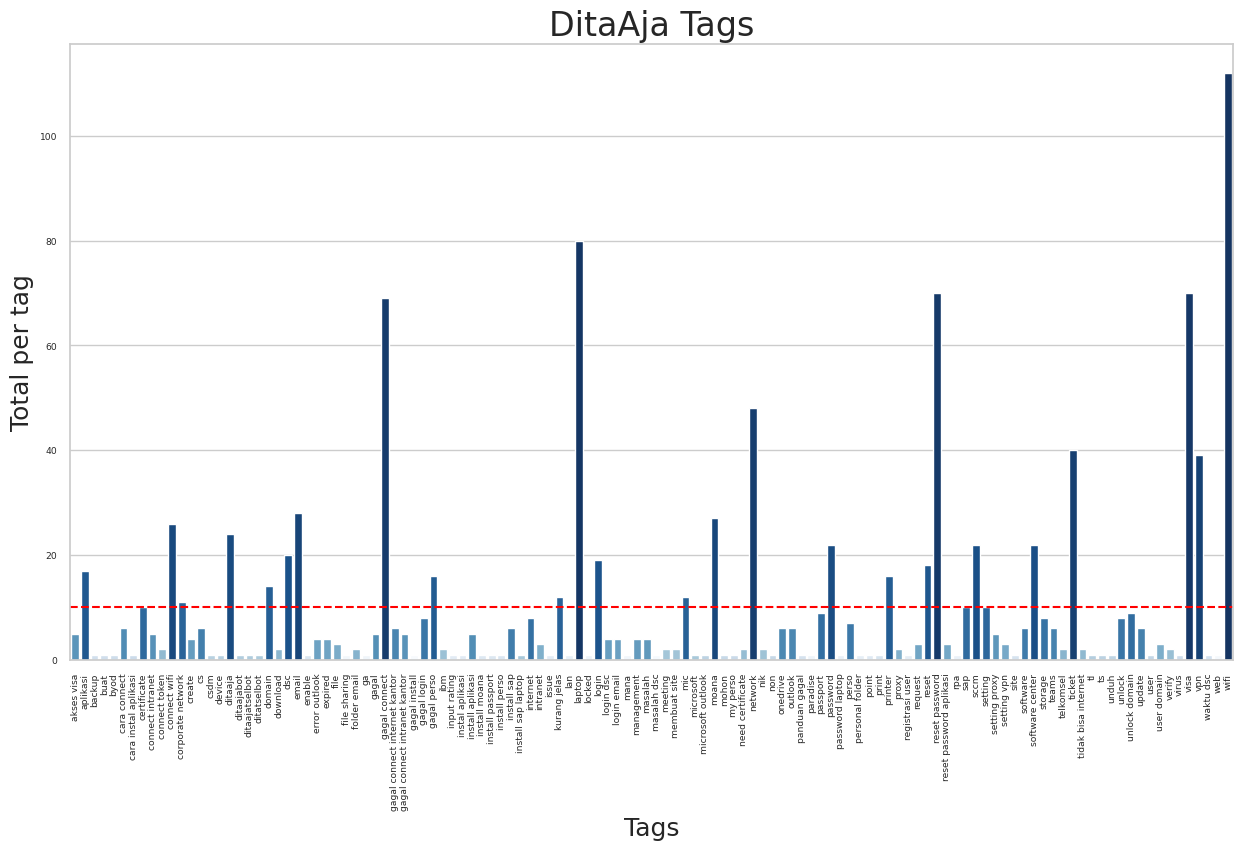

In [224]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.6)
sns.set_style('whitegrid') 

pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  
sns.barplot(x=bar_plot['cat'], y=bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("DitaAja Tags", fontsize=24)
plt.ylabel('Total per tag', fontsize=18)
plt.xlabel('Tags', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [225]:
columns = t1.columns[1:]
selected_data = bar_plot[bar_plot['count'] >= threshold]
categories = selected_data['cat'].values

drop_tag = []
for i in t1.columns[1:]:
    if i not in categories:
        drop_tag.append(i)

t1 = t1.drop(drop_tag, axis=1)

In [226]:
t1 = t1.loc[(t1[t1.columns[1:]].T != 0).any()]

In [227]:
import csv
t1.to_csv('datasets/new_dataset.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)

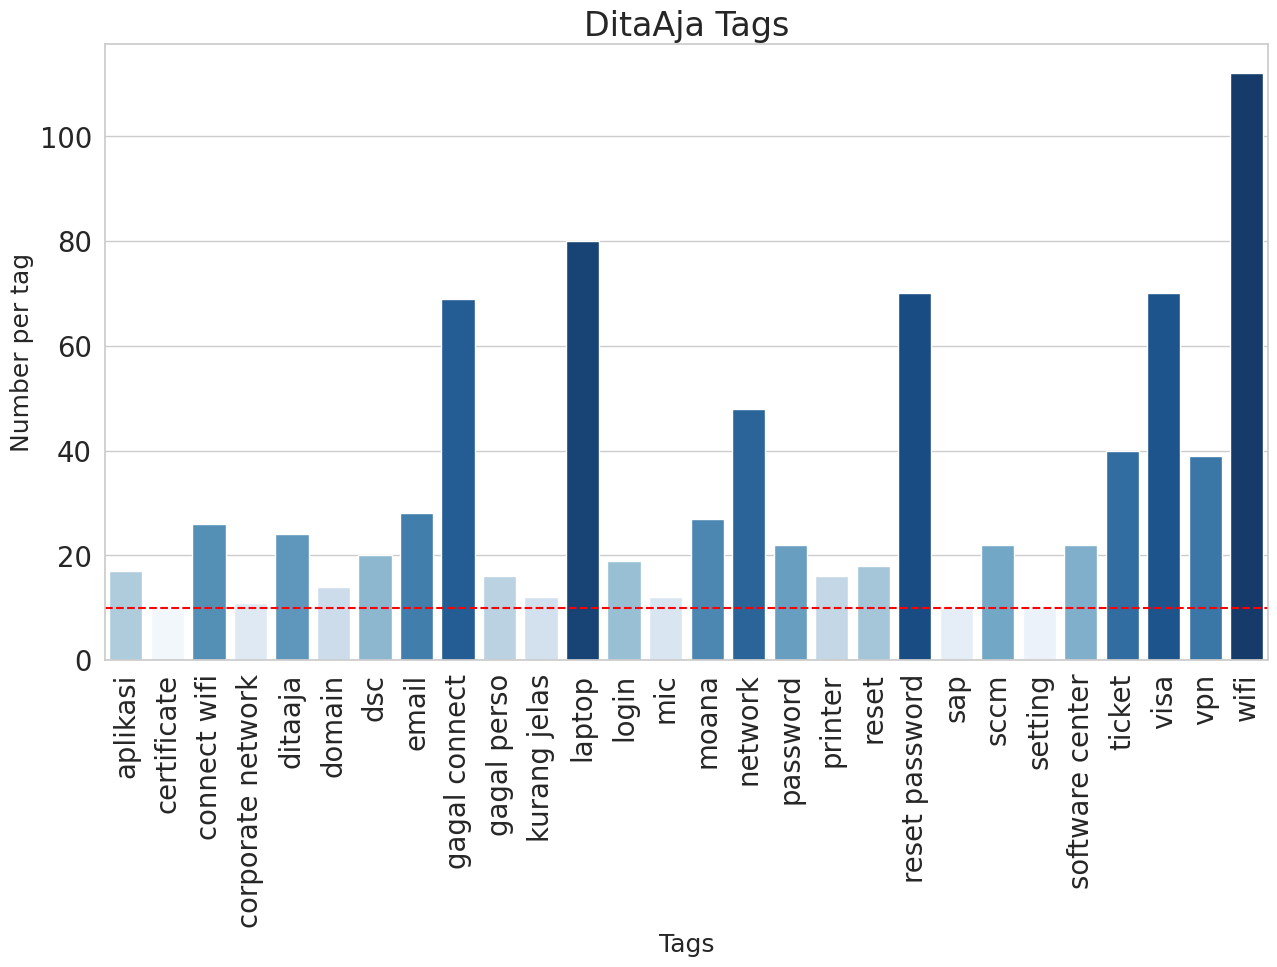

In [228]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
selected_columns = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.8)
sns.set_style('whitegrid') 

pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  
sns.barplot(x=bar_plot['cat'], y=bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("DitaAja Tags", fontsize=24)
plt.ylabel('Number per tag', fontsize=18)
plt.xlabel('Tags', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [229]:
df2 = pd.read_excel('RAW/DitaAja_Trained_Data.xlsx', "Test")

In [230]:
df2['training_data'] = df2['training_data'].apply(lambda x: x.lower())
df2['tagging'] = df2['tagging'].apply(lambda x: x.lower())

In [231]:
selected_columns

Index(['aplikasi', 'certificate', 'connect wifi', 'corporate network',
       'ditaaja', 'domain', 'dsc', 'email', 'gagal connect', 'gagal perso',
       'kurang jelas', 'laptop', 'login', 'mic', 'moana', 'network',
       'password', 'printer', 'reset', 'reset password', 'sap', 'sccm',
       'setting', 'software center', 'ticket', 'visa', 'vpn', 'wifi'],
      dtype='object')

In [232]:
c1 = ['questions', 'tagging']
c1.extend(selected_columns)
t1 = pd.DataFrame(columns=c1)
t1['questions'] = df2['training_data']
t1['tagging'] = df2['tagging']
t1.fillna(0, inplace=True)
new_row = []

In [233]:
t1 = t1.apply(changeLabelValue, axis=1)

In [234]:
t1 = t1.drop(['tagging'], axis=1)

In [235]:
# t1 = t1.apply(splitNewRow, axis=1)

In [236]:
t2 = pd.DataFrame(new_row, columns=t1.columns)
t1 = t1.append(t2)

/tmp/ipykernel_65057/4157487551.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t1 = t1.append(t2)


In [237]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

In [238]:
t1 = t1.loc[(t1[t1.columns[1:]].T != 0).any()]

In [239]:
import csv
t1.to_csv('datasets/data_test.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)